In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from netCDF4 import num2date,date2num,Dataset
from mpl_toolkits.basemap import Basemap
import pyart
%matplotlib inline

In [2]:
basepath = '/mnt/raid/mvanlier/'
midpath = 'nexrad_kvnx_520/'
#midpath = 'nexrad_kvnx_523/'
#midpath = 'nexrad_kvnx_524/'
refname = 'reflectivity'
zdrname = 'differential_reflectivity'
rhoname = 'cross_correlation_ratio'
phiname = 'differential_phase'

In [43]:
#filenm = '/mnt/raid/mvanlier/nexrad_kvnx_520/KVNX20110520_100147_V06'
#filenm = '/mnt/raid/mvanlier/nexrad_kvnx_520/KVNX20110520_063155_V06'
filenm = '/mnt/raid/mvanlier/nexrad_kvnx_520/KVNX20110520_112410_V06'
#filenm = '/mnt/raid/mvanlier/nexrad_kvnx_523/KVNX20110523_200948_V06'
#filenm = '/mnt/raid/mvanlier/nexrad_kvnx_523/KVNX20110523_221102_V06'
#filenm = '/mnt/raid/mvanlier/nexrad_kvnx_524/KVNX20110524_193750_V06'
#filenm = '/mnt/raid/mvanlier/nexrad_kvnx_524/KVNX20110524_215839_V06'
#filenm = '/mnt/raid/mvanlier/nexrad_kvnx_425/KVNX20110425_082219_V06'
radarraw = pyart.io.read_nexrad_archive(filenm)
#filenm = 'KVNX20110524_194232_V06'
#filenm = 'KVNX20110520_114130_V06'
#radarraw = pyart.io.read_nexrad_archive(basepath+midpath+filenm)
#print radarraw.fields

In [44]:
display = pyart.graph.RadarMapDisplay(radarraw)

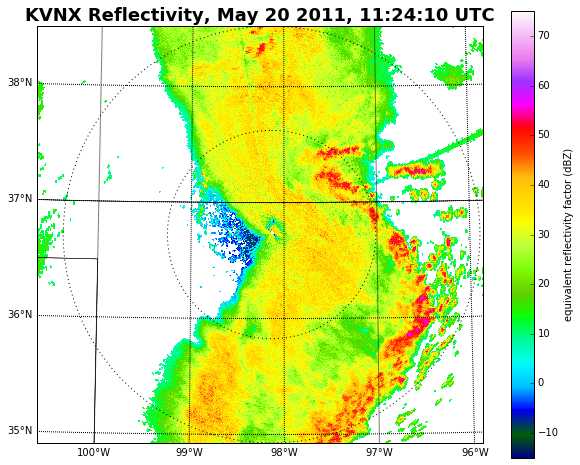

In [45]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
tilt = 0
min_lon = -100.6
max_lon = -95.8
min_lat = 34.9
max_lat = 38.5
kvnx_lat =  36.737
kvnx_lon = -98.124
m = Basemap(width=450000.,height=400000,projection='lcc',resolution='i',
            lon_0=kvnx_lon,lat_0=kvnx_lat,lat_1=33.,lat_2=39.)
parallels = np.arange(33.,40.,1.)
meridians = np.arange(259.,273.,1.)
#m.drawstates(color='k')
#m.drawparallels(parallels,color='r',labels=[True,False,False,False])
#m.drawmeridians(meridians,color='r',labels=[False,False,False,True])
m.tissot(kvnx_lon,kvnx_lat,54./60.,100,edgecolor='k',facecolor='none',ls='dotted')
m.tissot(kvnx_lon,kvnx_lat,108./60.,100,edgecolor='k',facecolor='none',ls='dotted')

display.plot_ppi_map(refname,tilt,vmin=-15.,vmax=75., cmap=cm.gist_ncar,
                     min_lon=min_lon,max_lon=max_lon,
                     min_lat=min_lat,max_lat=max_lat,
                     resolution='h',ax=ax1,title_flag=False)
plt.title('KVNX Reflectivity, May 20 2011, 11:24:10 UTC',fontsize=18,fontweight='bold')
fig.savefig('kvnx_zhh_112410.png',dpi=100)
# plt.title('KVNX Reflectivity, May 20 2011, 06:31:55 UTC',fontsize=18,fontweight='bold')
# fig.savefig('kvnx_zhh_063155.png',dpi=100)
#plt.title('KVNX Reflectivity, May 20 2011, 10:01:47 UTC',fontsize=18,fontweight='bold')
#fig.savefig('kvnx_zhh_100147.png',dpi=100)

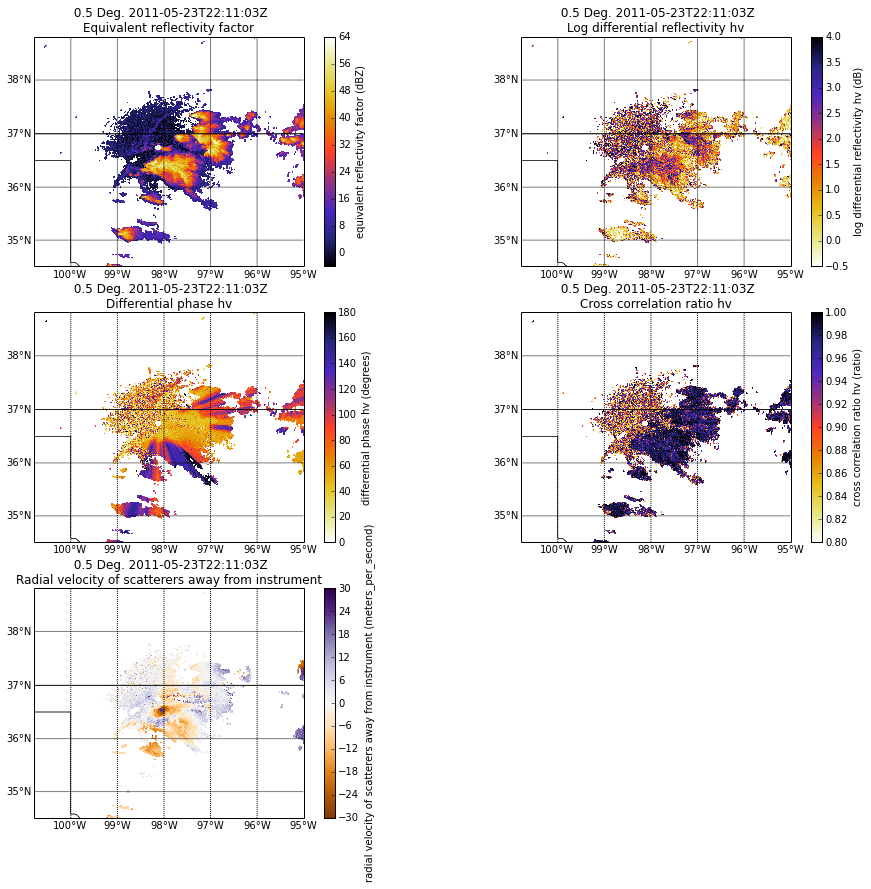

In [9]:
fig = plt.figure(figsize=(10,))
tilt = 0
min_lon = -100.8
max_lon = -95.
min_lat = 34.5
max_lat = 38.8
#min_lon = -101.
#max_lon = -99.
#min_lat = 34.5
#max_lat = 36.
# min_lon = -98.
# max_lon = -95.5
# min_lat = 34.
# max_lat = 36. 
# min_lon = -98.5
# max_lon = -96.8
# min_lat = 35.
# max_lat = 36.5
#..........
ax1=fig.add_subplot(3,2,1)
display.plot_ppi_map(refname,tilt,vmin=-4.,vmax=64.,
                     auto_range=False,
                     min_lon=min_lon,max_lon=max_lon,
                     min_lat=min_lat,max_lat=max_lat,
                     resolution='h',
                     cmap=cm.CMRmap)
ax1=fig.add_subplot(3,2,2)
display.plot_ppi_map(zdrname,tilt,vmin=-.5,vmax=4.,
                     auto_range=False,
                     min_lon=min_lon,max_lon=max_lon,
                     min_lat=min_lat,max_lat=max_lat,
                     resolution='h',
                     cmap=cm.CMRmap_r)
ax1=fig.add_subplot(3,2,3)
display.plot_ppi_map(phiname,tilt,vmin=0.,vmax=180.,
                     auto_range=False,
                     min_lon=min_lon,max_lon=max_lon,
                     min_lat=min_lat,max_lat=max_lat,
                     resolution='h',
                     cmap=cm.CMRmap_r)
ax1=fig.add_subplot(3,2,4)
display.plot_ppi_map(rhoname,tilt,vmin=.8,vmax=1.,
                     auto_range=False,
                     min_lon=min_lon,max_lon=max_lon,
                     min_lat=min_lat,max_lat=max_lat,
                     resolution='h',
                     cmap=cm.CMRmap_r)
ax1=fig.add_subplot(3,2,5)
display.plot_ppi_map('velocity',tilt+1,vmin=-30.,vmax=30.,
                     auto_range=False,
                     min_lon=min_lon,max_lon=max_lon,
                     min_lat=min_lat,max_lat=max_lat,
                     resolution='h',
                     cmap=cm.PuOr)
fig.savefig('kvnx_ppi_523.png',dpi=120)
#fig.savefig('kvnx_ducting_524_a.png')

In [ ]:
def _ncvar_to_dict(ncvar):
    """ Convert a NetCDF Dataset variable to a dictionary. """
    d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs())
    d['data'] = ncvar[:]
    return d

In [2]:
filenm = '/mnt/raid/mvanlier/nexrad_kvnx_520/KVNX20110520_103628_V06'
radfull = pyart.io.read_nexrad_archive(filenm)
radcut = radfull.extract_sweeps([0])

In [ ]:
rainnm = '/mnt/raid/mvanlier/ryzhkov_rain/520/PrecipRateA/00.50/20110520-103628.netcdf'
nc = Dataset(rainnm,'r')

In [39]:
rainrate_a = nc.variables['PrecipRateA'][:,:]
az_from_nc = nc.variables['Azimuth'][:]



In [28]:
time = dict({'name':'time'})
time['data'] = 57.
print time
# _range = dict({'comment': 'Coordinate variable for range. Range to center of each bin.', 
#             'meters_to_center_of_first_gate': 2125., 'spacing_is_constant': 'true', 
#             'long_name': 'range_to_measurement_volume', 'standard_name': 'projection_range_coordinate', 
#             'meters_between_gates': 1000., 'units': 'meters', 'axis': 'radial_range_coordinate'})
# _range['data'] = np.linspace(2125.,299125.,num=298,endpoint=True)
# print _range

{'data': 57.0, 'name': 'time'}


In [26]:
print radcut.time

{'comment': 'Coordinate variable for time. Time at the center of each ray, in fractional seconds since the global variable time_coverage_start', 'long_name': 'time_in_seconds_since_volume_start', 'standard_name': 'time', 'units': 'seconds since 2011-05-20T10:36:28Z', 'calendar': 'gregorian', 'data': array([  0.128,   0.153,   0.175,   0.199,   0.224,   0.249,   0.271,
         0.296,   0.321,   0.345,   0.367,   0.389,   0.411,   0.436,
         0.46 ,   0.485,   0.507,   0.532,   0.557,   0.578,   0.603,
         0.625,   0.65 ,   0.675,   0.7  ,   0.724,   0.746,   0.768,
         0.79 ,   0.815,   0.839,   0.861,   0.886,   0.908,   0.929,
         0.954,   0.979,   1.   ,   1.022,   1.047,   1.071,   1.093,
         1.115,   1.14 ,   1.161,   1.186,   1.208,   1.233,   1.255,
         1.28 ,   1.301,   1.326,   1.348,   1.373,   1.394,   1.419,
         1.441,   1.466,   1.488,   1.513,   1.534,   1.559,   1.581,
         1.606,   1.627,   1.652,   1.674,   1.699,   1.721,   1.746,

In [ ]:
numrays = 360

filemetadata = FileMetadata('cfradial', field_names, additional_metadata,
                                file_field_names, exclude_fields)

metadata = dict([(k,getattr(nc,k)) for k in nc.ncattrs
metadata['volume_number'] = 0
global_vars = {'platform_type': 'fixed', 'instrument_type': 'radar',
                   'primary_axis': 'axis_z'}
for var, default_value in global_vars.iteritems():
    if var in ncvars:
        metadata[var] = str(netCDF4.chartostring(ncvars[var][:]))
    else:
        metadata[var] = default_value
        
#..Fake the time...................................
#time = _ncvar_to_dict(ncvars['time'])
time = dict({'comment':'time since start of scan, not reliable',
             'long_name':'time_in_seconds_since_volume_start',
             'standard_name':'time','units':'seconds since volume start',
             'calendar':'gregorian'})
time['data'] = np.linspace(0.,4.*60.,num=360,endpoint=True)

#..Fake the range..................................
_range = dict({'comment': 'Coordinate variable for range. Range to center of each bin.', 
            'meters_to_center_of_first_gate': 2125., 'spacing_is_constant': 'true', 
            'long_name': 'range_to_measurement_volume', 'standard_name': 'projection_range_coordinate', 
            'meters_between_gates': 1000., 'units': 'meters', 'axis': 'radial_range_coordinate'})
_range['data'] = np.linspace(2125.,300125.,num=298,endpoint=True)

#..Fake the fields, yo. It's a dict of dicts. Might as well do rain_a and rain_z
d_rain_a = dict({'_FillValue': -9999.0, 'valid_max': 500.0, 'standard_name': 'precipitation_rate_a', 
                 'coordinates': 'elevation azimuth range', 'long_name': 'precipitation_rate_a', 
                 'valid_min': 0.0, 'units': 'mm/hr'})
d_rain_a['data'] = rainrate_a
#..
d_rain_z = dict({'_FillValue': -9999.0, 'valid_max': 500.0, 'standard_name': 'precipitation_rate_z', 
                 'coordinates': 'elevation azimuth range', 'long_name': 'precipitation_rate_z', 
                 'valid_min': 0.0, 'units': 'mm/hr'})
d_rain_z['data'] = rainrate_z
#..Wrap these dicts into a fields dict
fields = dict({'precipitation_rate_a':d_rain_a,'precipitation_rate_z':d_rain_z})

#..Get the location
latitude=dict({'units': 'degrees_north', 'long_name': 'Latitude', 
               'standard_name': 'Latitude', 'data': np.array([ 36.74083328])})
longitude=dict({'units': 'degrees_east', 'long_name': 'Longitude',
               'standard_name': 'Longitude', 'data': np.array([-98.12750244])})
altitude=dict({'units': 'meters', 'long_name': 'Altitude', 
               'standard_name': 'Altitude', 'data': np.array([ 378.]), 'positive': 'up'})

#..Other stuff
sweep_number=dict({'units': 'count', 'long_name': 'Sweep number', 
                   'standard_name': 'sweep_number', 'data': array([0], dtype=int32)})
sweep_mode=dict({'units': 'unitless', 'long_name': 'Sweep mode', 
                 'standard_name': 'sweep_mode', 'data': np.array(['azimuth_surveillance'],dtype='|S20')})
fixed_angle=dict({'units': 'degrees', 'long_name': 'Target angle for sweep', 
                  'standard_name': 'target_fixed_angle', 'data': np.array([ 0.48339844], dtype=float32)})
sweep_start_ray_index=dict({'units': 'count', 'long_name': 'Index of first ray in sweep, 0-based', 
                            'data': np.array([0])}
sweep_end_ray_index=dict({'units': 'count', 'long_name': 'Index of last ray in sweep, 0-based', 
                          'data': array([numrays-1])})
azimuth=dict({'comment': 'Azimuth of antenna relative to true north', 'long_name': 'azimuth_angle_from_true_north', 
              'standard_name': 'beam_azimuth_angle', 'units': 'degrees','axis': 'radial_azimuth_coordinate'})
azimuth['data'] = az_from_nc
elevation=dict({'comment': 'Elevation of antenna relative to the horizontal plane', 
                 'long_name': 'elevation_angle_from_horizontal_plane', 
                 'standard_name': 'beam_elevation_angle', 'units': 'degrees','axis':'radial_elevation_coordinate'})
elevation['data'] = np.ones(numrays)*.5
instrument_parameters=None                
radar_calibration=None
altitude_agl=None
scan_rate=None


    
Radar(
        time, _range, fields, metadata, scan_type,
        latitude, longitude, altitude,
        sweep_number, sweep_mode, fixed_angle, sweep_start_ray_index,
        sweep_end_ray_index,
        azimuth, elevation,
        instrument_parameters=instrument_parameters,
        radar_calibration=radar_calibration,
        altitude_agl=altitude_agl,
        scan_rate=scan_rate,
        antenna_transition=antenna_transition)    
    
    
    
    
    
    
    
#radcut.add_field_like('reflectivity','precipitation_rate_a',rainrate_a)

In [15]:
np.ones(360)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [35]:
print radcut.range['data']
print radcut.metadata

[  2125   2375   2625 ..., 459375 459625 459875]
{'comment': '', 'title': '', 'Conventions': 'CF/Radial instrument_parameters', 'source': '', 'version': '1.3', 'references': '', 'instrument_name': '', 'history': '', 'institution': '', 'original_container': 'NEXRAD Level II'}
